In [1]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
s=SimpleImputer(strategy="most_frequent")
train[['Age']]=s.fit_transform(train[['Age']])

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
col=train[['Sex']]

In [7]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in col:
    col[i]=l.fit_transform(col[i])
train[['Sex']]=col

<ipython-input-7-78f68a48d3e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[i]=l.fit_transform(col[i])


In [8]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,NaN,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",NaN,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,0.647587,28.566970,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,0.477990,13.199572,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,0.000000,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,0.000000,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,1.000000,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,1.000000,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<Axes: xlabel='Survived', ylabel='Age'>

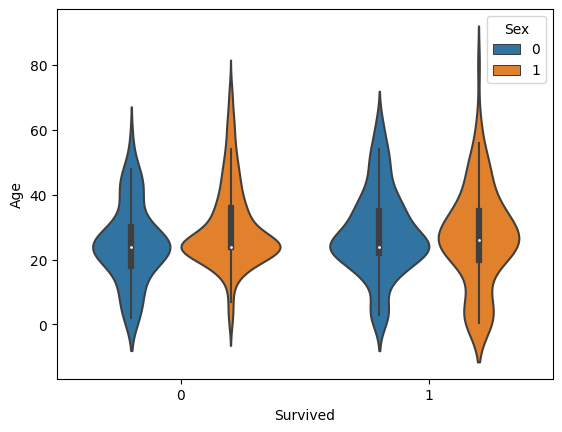

In [9]:
import seaborn as sns
sns.violinplot(data=train,x='Survived',y='Age',hue="Sex",kind="bar")

In [10]:
train.drop(['PassengerId','Name','Ticket','Fare','Embarked','Cabin'],axis=1,inplace=True)

In [11]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [12]:
x=train.drop(['Survived'],axis=1)

In [13]:
y=train[['Survived']]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [17]:
clf.fit(X_train, y_train)

<ipython-input-17-4f66baab8f93>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [24]:
depth = list()
count = list()

for i in range(1, 201, 5):
    clf = RandomForestClassifier(max_depth=i * 5, random_state=0)
    clf.fit(X_train, y_train)
    x = clf.predict(X_test)
    depth.append(sklearn.metrics.accuracy_score(y_test, x))


for i in range(1, 201, 5):
    clf = RandomForestClassifier(max_depth=8, n_estimators=i*5, random_state=0)
    clf.fit(X_train, y_train)
    x = clf.predict(X_test)
    count.append(sklearn.metrics.accuracy_score(y_test, x))

In [21]:
from matplotlib import pyplot as plt

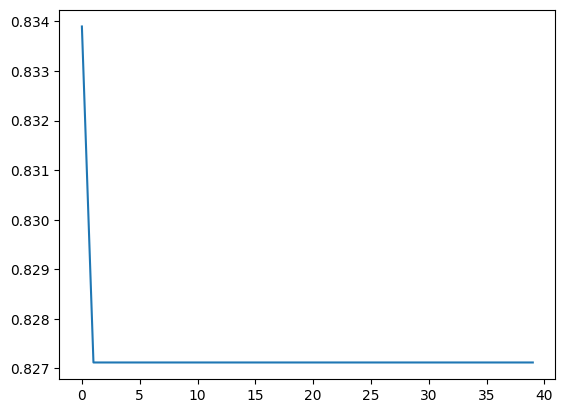

In [22]:
plt.plot(depth)
plt.show()

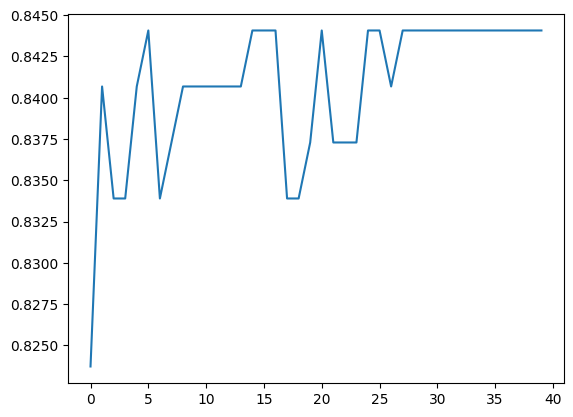

In [23]:
plt.plot(count)
plt.show()